# Real cases of BGP anomaly

## Google’s May 2005 Outage
The cause of the Google outage on May 7, 2005, was initially attributed to internal DNS misconfigurations by Google. However, further analysis revealed that a BGP anomaly, specifically a prefix hijacking incident by Autonomous System (AS) 174, was also a potential cause for the service disruption. This prefix hijacking led to a loss of connectivity to the google.com domain for a duration ranging between 15 to 60 minutes, starting around 22:10 UTC. The hijacking caused almost half of the ASes that advertised these prefixes to switch to an incorrect path, leading to further connectivity issues.

In the case of the Google May 2005 outage, it was observed that AS174, operated by Cogent and apparently independent from Google, began originating routes for the prefix 64.233.161.0/24 just before the service outage. This is unusual because typically, only the legitimate owner of an IP prefix (in this case, Google) should announce routes for that prefix. When another entity, like AS174 in this instance, starts announcing routes for a prefix they don't own, it's called a BGP hijack.

Solution: find out when AS started and stopped announcing the prefix - 64.233.161.0/24, which was assigned to Google, helping to visualize the hijacking event's start, duration, and end.

2023-10-17 11:58:40 1168823: bgpstream_parsebgp_common.c:587: WARNING: Read truncated record 33789 from 'http://archive.routeviews.org/bgpdata/2005.05/UPDATES/updates.20050507.0650.bz2'
2023-10-17 11:58:40 1168823: bgpstream_parsebgp_common.c:587: WARNING: Read truncated record 37738 from 'http://archive.routeviews.org/bgpdata/2005.05/UPDATES/updates.20050507.0650.bz2'
2023-10-17 11:59:39 1168823: bgpstream_parsebgp_common.c:587: WARNING: Read truncated record 22799 from 'http://archive.routeviews.org/bgpdata/2005.05/UPDATES/updates.20050507.1614.bz2'
2023-10-17 11:59:43 1168823: bgpstream_parsebgp_common.c:587: WARNING: Read truncated record 45519 from 'http://archive.routeviews.org/bgpdata/2005.05/UPDATES/updates.20050507.1629.bz2'
2023-10-17 11:59:43 1168823: bgpstream_parsebgp_common.c:587: WARNING: Read truncated record 280 from 'http://archive.routeviews.org/bgpdata/2005.05/UPDATES/updates.20050507.1644.bz2'


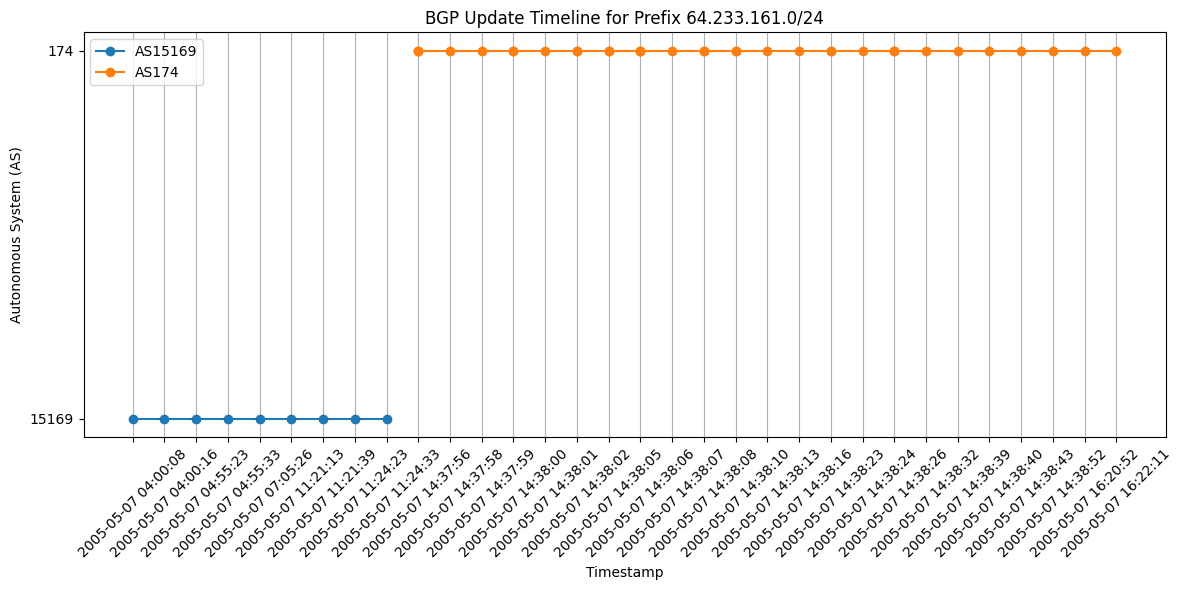

In [43]:
import pybgpstream
import matplotlib.pyplot as plt
from datetime import datetime

# Define the time window around the TTNet incident
start_time = "2005-05-07 00:00:00"
end_time = "2005-05-07 23:59:00"

# Initialize the BGPStream to use multiple RouteViews collectors
stream = pybgpstream.BGPStream(
    from_time=start_time,
    until_time=end_time,
    collectors=["route-views2", "route-views3", "route-views4", "ris-ripe", "bview", "rib"],
    record_type="updates",
)

as_path_data = {}
timeline_data = {}

for elem in stream:
    if elem.type == "A" and elem.fields["prefix"] == "64.233.161.0/24":
        as_path = elem.fields["as-path"].split(" ")
        originating_as = as_path[-1]
        timestamp = datetime.utcfromtimestamp(elem.time).strftime('%Y-%m-%d %H:%M:%S')
        
        if originating_as not in as_path_data:
            as_path_data[originating_as] = 1
            timeline_data[originating_as] = [timestamp]
        else:
            as_path_data[originating_as] += 1
            timeline_data[originating_as].append(timestamp)

# Plotting the BGP Update Timeline
plt.figure(figsize=(12, 6))
for as_num, timestamps in timeline_data.items():
    plt.plot(timestamps, [as_num] * len(timestamps), marker='o', label=f"AS{as_num}")

plt.xlabel('Timestamp')
plt.ylabel('Autonomous System (AS)')
plt.title('BGP Update Timeline for Prefix 64.233.161.0/24')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='x')
plt.show()

## December 24, 2004: TTNet in Turkey hijacks the Internet

Turkish ISP TTnet (AS 9121) mistakenly begins advertising over 100,000 routes for other networks with itself as the destination. A misconfigured peering with an upstream AS allows these advertisements to be propagated throughout the global Internet, affecting just about everyone. Various portions of the Internet become unavailable for different organizations around the world for several hours.


Instruction:
`Generate Python code using the PyBGPStream library to analyise TTNet hijack incident that occurred on December 24, 2004. The code should collect and analyze BGP data for that specific time frame and visualize the data.`

2023-10-17 10:47:26 1168823: bgpstream_parsebgp_common.c:587: WARNING: Read truncated record 6011 from 'http://archive.routeviews.org/bgpdata/2004.12/UPDATES/updates.20041224.0918.bz2'
2023-10-17 10:47:26 1168823: bgpstream_parsebgp_common.c:587: WARNING: Read truncated record 6017 from 'http://archive.routeviews.org/bgpdata/2004.12/UPDATES/updates.20041224.0918.bz2'
2023-10-17 10:47:26 1168823: bgpstream_parsebgp_common.c:587: WARNING: Read truncated record 6027 from 'http://archive.routeviews.org/bgpdata/2004.12/UPDATES/updates.20041224.0918.bz2'
2023-10-17 10:47:26 1168823: bgpstream_parsebgp_common.c:587: WARNING: Read truncated record 7037 from 'http://archive.routeviews.org/bgpdata/2004.12/UPDATES/updates.20041224.0918.bz2'
2023-10-17 10:47:26 1168823: bgpstream_parsebgp_common.c:587: WARNING: Read truncated record 7041 from 'http://archive.routeviews.org/bgpdata/2004.12/UPDATES/updates.20041224.0918.bz2'
2023-10-17 10:47:26 1168823: bgpstream_parsebgp_common.c:587: WARNING: Read

Most common prefixes: [('202.64.159.0/24', 16703), ('202.64.40.0/24', 16158), ('61.4.0.0/19', 16114), ('209.114.254.0/24', 15583), ('216.243.234.0/23', 11747), ('193.73.62.0/24', 10733), ('198.76.159.0/24', 10165), ('198.76.158.0/24', 10165), ('198.76.157.0/24', 10165), ('198.76.156.0/24', 10165)]
Most common AS paths: [(('286', '6762', '9121'), 427112), (('6762', '9121'), 402684), (('6939', '6762', '9121'), 290237), (('12956', '6762', '9121'), 192136), (('13237', '6762', '9121'), 161960), (('6939', '3491', '6762', '9121'), 119497), (('3303', '6762', '9121'), 65510), (('6453', '701', '21617'), 59740), (('3549', '701', '21617'), 56881), (('8121', '23352', '3491', '6762', '9121'), 49069)]
Prefix length distribution: Counter({'24': 7816668, '23': 1143329, '22': 968057, '20': 882696, '19': 839276, '21': 732976, '16': 614084, '18': 330248, '17': 218261, '15': 37534, '14': 19682, '13': 8830, '8': 5809, '25': 4786, '26': 3757, '12': 3405, '29': 1673, '30': 1451, '27': 1042, '11': 838, '28': 6

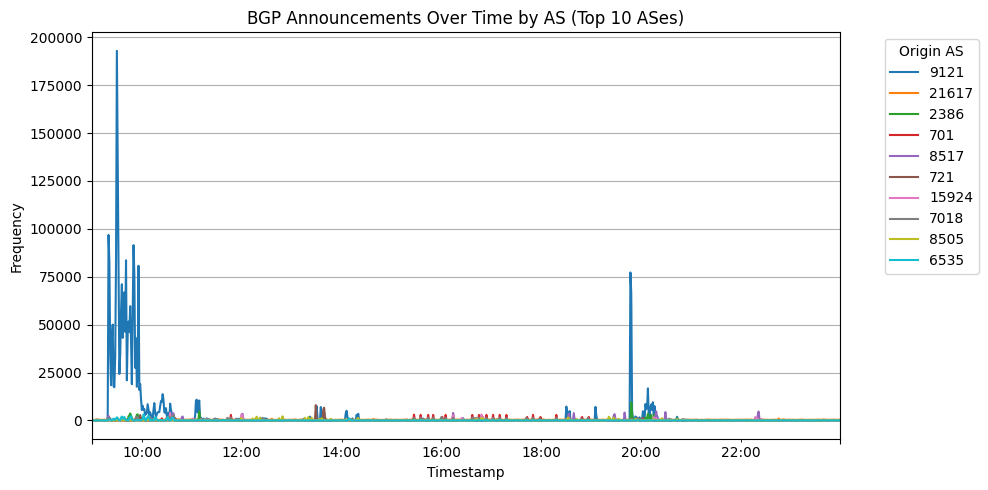

In [27]:
import pybgpstream
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from datetime import datetime

# Define the time window
start_time = "2004-12-24 09:00:00"
end_time = "2004-12-24 23:59:00"

# Initialize the BGPStream
stream = pybgpstream.BGPStream(
    from_time=start_time,
    until_time=end_time,
    collectors=["route-views2", "route-views3", "route-views4", "ris-ripe", "bview"],
    record_type="updates"
)

# Dictionary to store the count of BGP announcements per AS per minute
as_announcements = {}

prefix_counter = Counter()
as_path_counter = Counter()
prefix_length_counter = Counter()

# Process BGP records
for rec in stream.records():
    for elem in rec:
        if elem.type == "A":  # Check for BGP announcements
            prefix = elem.fields["prefix"]
            as_path = elem.fields["as-path"].split()
            origin_as = as_path[-1]
            prefix_length = prefix.split('/')[-1]  # Get the prefix length
            timestamp = elem.time 


            if prefix not in as_announcements:
                as_announcements[prefix] = []
            as_announcements[prefix].append((as_path, prefix_length, timestamp))

            # Aggregate data
            prefix_counter[prefix] += 1
            as_path_counter[tuple(as_path)] += 1
            prefix_length_counter[prefix_length] += 1
            

# Print aggregated data
print("Most common prefixes:", prefix_counter.most_common(10))
print("Most common AS paths:", as_path_counter.most_common(10))
print("Prefix length distribution:", prefix_length_counter)

# Convert data to DataFrame
df = pd.DataFrame([{
    'prefix': prefix,
    'as_path': ' -> '.join(path),
    'origin_as': path[-1],  # Get the origin AS from the AS path
    'prefix_length': prefix_length,
    'timestamp': timestamp
} for prefix, paths in as_announcements.items() for path, prefix_length, timestamp in paths])

# Save data in a CSV file
df.to_csv("as_announcements.csv")

# Convert timestamp to datetime and set as index
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
df.set_index('timestamp', inplace=True)

# Resample data to get frequency of announcements by origin AS over time
resampled_data = df.groupby('origin_as').resample('T').size().unstack(fill_value=0)

# Get the top 10 ASes by total number of BGP announcements
top_10_ases = resampled_data.sum(axis=1).nlargest(10).index

# Filter the resampled_data to include only the top 10 ASes
top_10_resampled_data = resampled_data.loc[top_10_ases]

# Plotting time series of BGP announcements by AS for the top 10 ASes
fig, ax = plt.subplots(figsize=(10, 5))
top_10_resampled_data.transpose().plot(ax=ax, kind='line', legend=True)  # Transpose to have time on the x-axis
ax.set_title('BGP Announcements Over Time by AS (Top 10 ASes)')
ax.set_ylabel('Frequency')
ax.set_xlabel('Timestamp')
ax.legend(title='Origin AS', bbox_to_anchor=(1.05, 1), loc='upper left')  # Position legend outside plot
ax.grid(True)

plt.tight_layout()
plt.show()


/tmp/ipykernel_1168823/1328197064.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("as_announcements.csv")


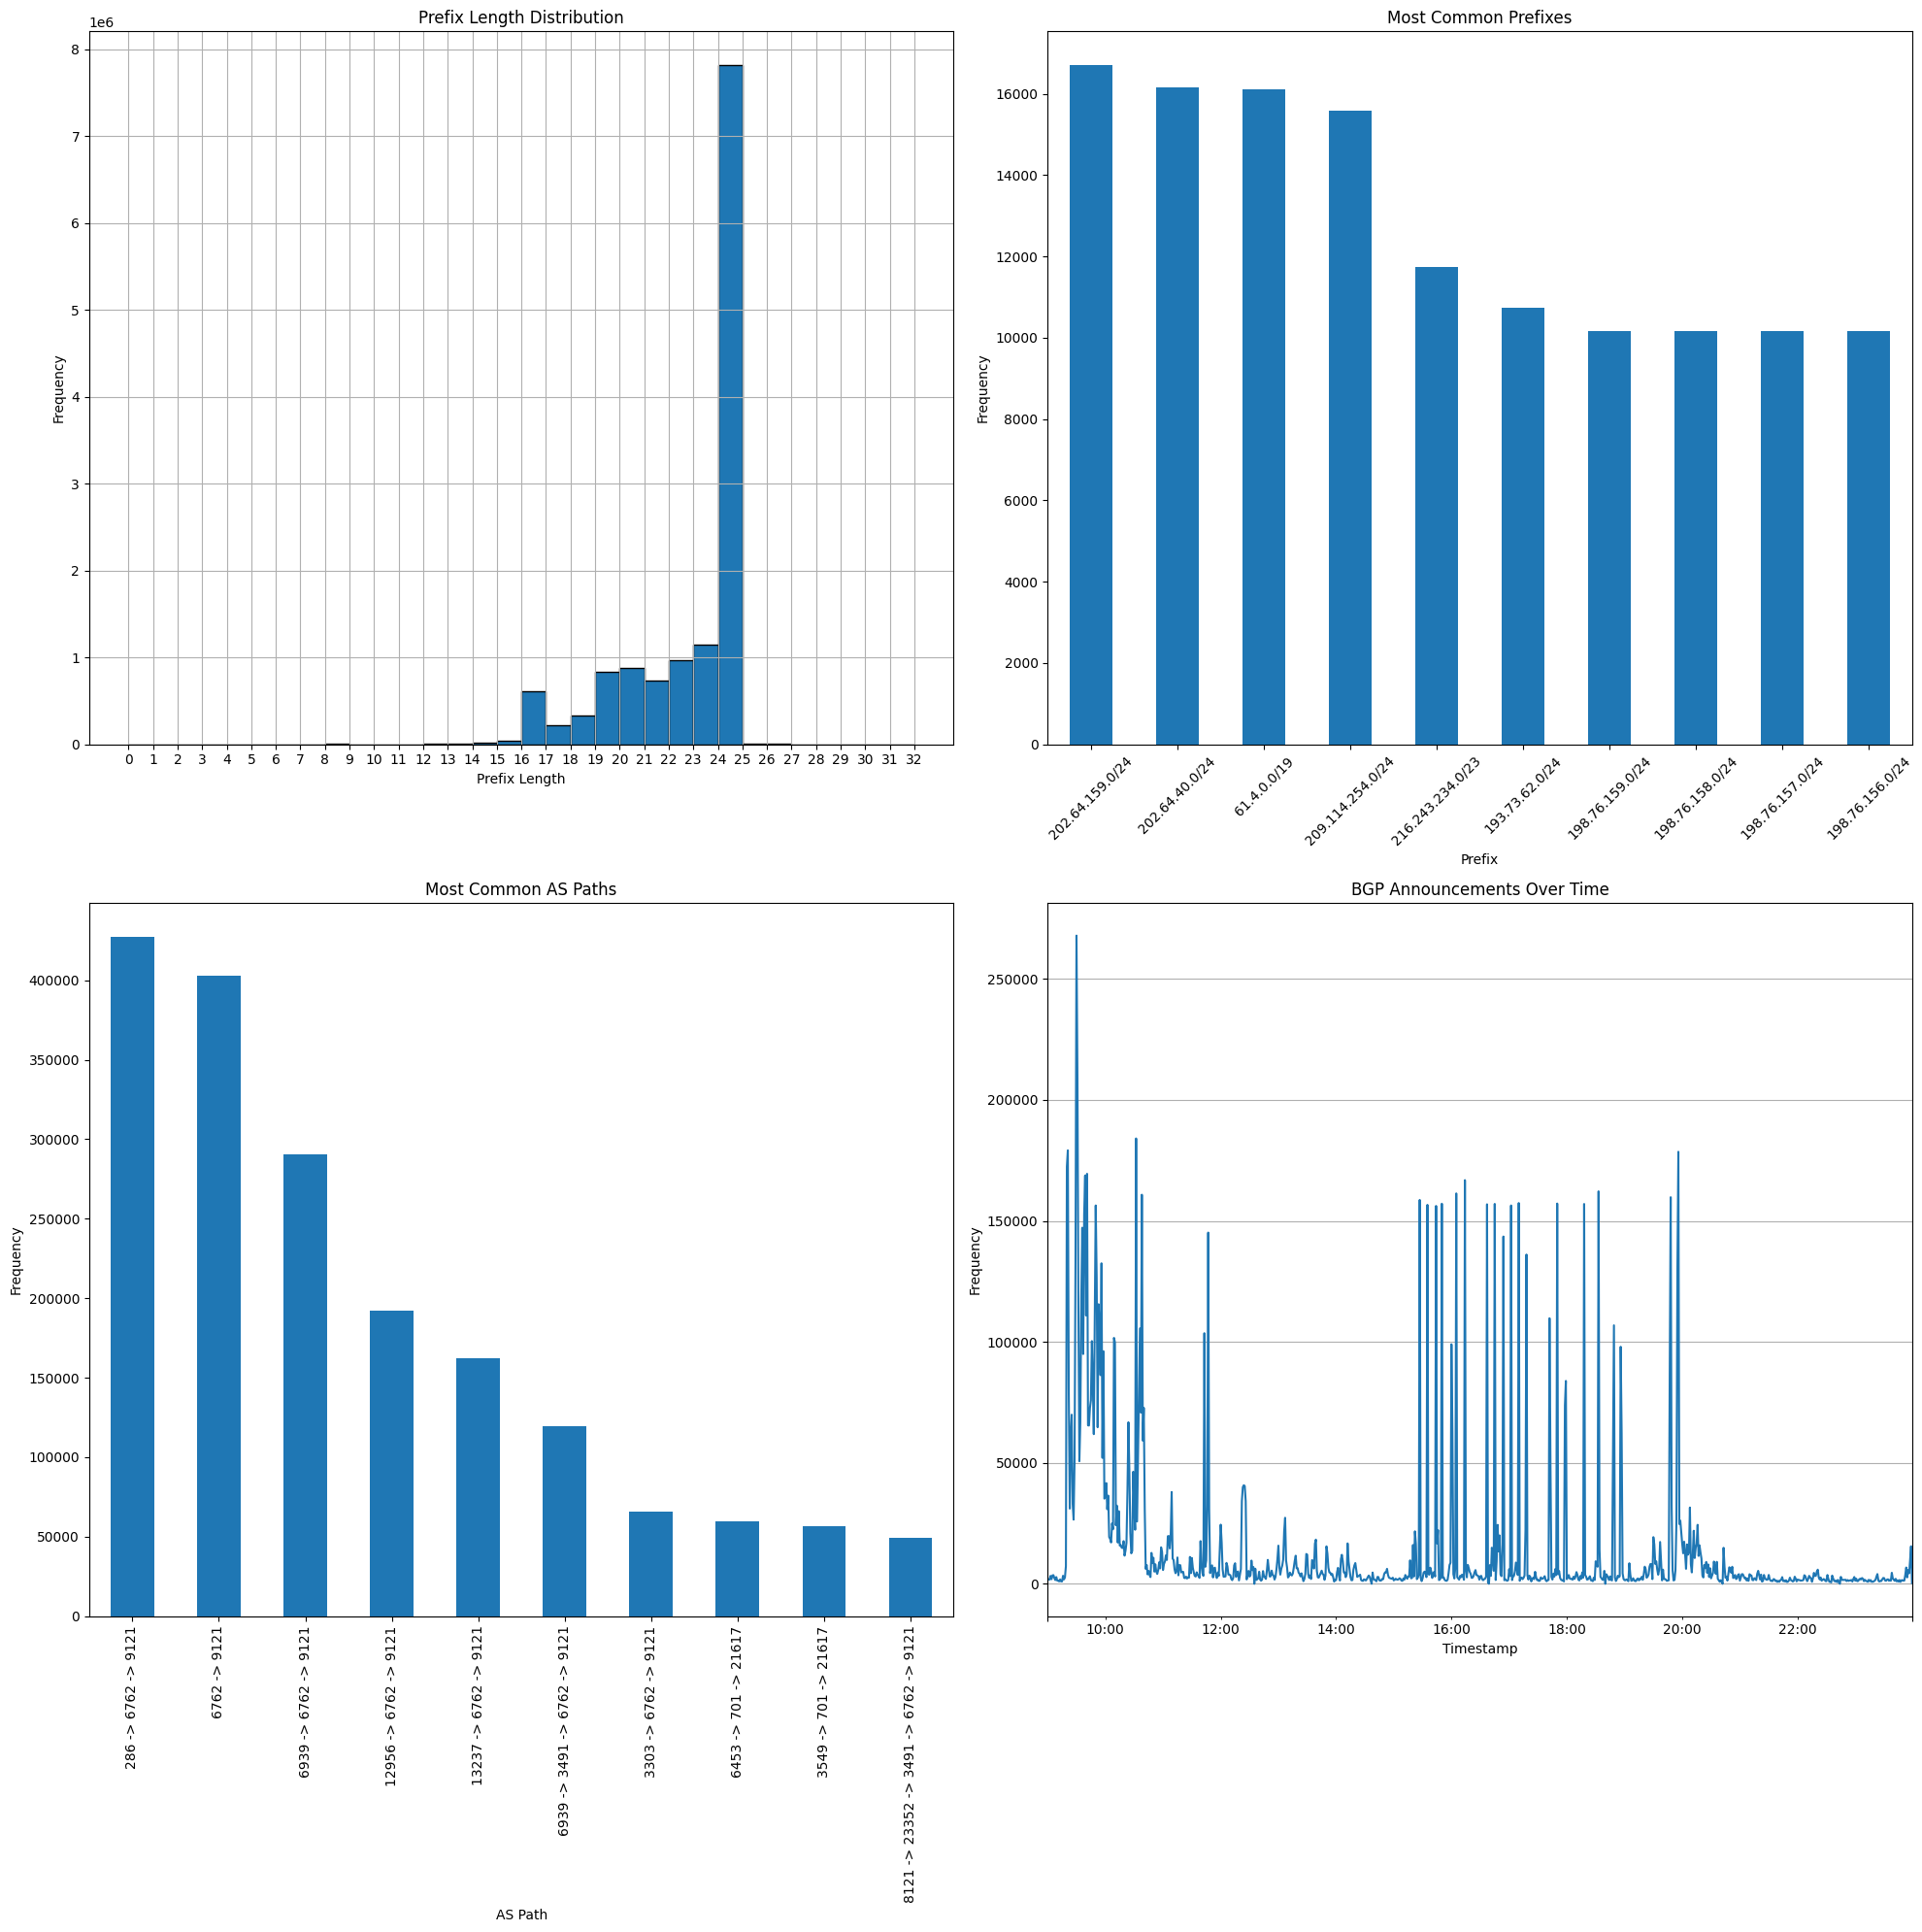

In [28]:
import matplotlib.pyplot as plt

df = pd.read_csv("as_announcements.csv")

common_prefixes = prefix_counter.most_common(10)
common_prefixes_df = pd.DataFrame(common_prefixes, columns=['Prefix', 'Count'])
common_as_paths = as_path_counter.most_common(10)
common_as_paths_df = pd.DataFrame(common_as_paths, columns=['AS Path', 'Count'])
common_as_paths_df['AS Path'] = common_as_paths_df['AS Path'].apply(lambda x: ' -> '.join(x))

df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
df.set_index('timestamp', inplace=True)
time_series = df.resample('T').size()  # Resample by minute

fig, axs = plt.subplots(2, 2, figsize=(20, 20))

# Plot 1: Prefix Length Distribution
axs[0, 0].hist(df['prefix_length'].astype(int), bins=range(0, 33), edgecolor='black')
axs[0, 0].set_title('Prefix Length Distribution')
axs[0, 0].set_xlabel('Prefix Length')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_xticks(range(0, 33))
axs[0, 0].grid(True)

# Plot 2: Most Common Prefixes
common_prefixes_df.plot(kind='bar', x='Prefix', y='Count', ax=axs[0, 1], legend=False)
axs[0, 1].set_title('Most Common Prefixes')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].tick_params(axis='x', rotation=45)

# Plot 3: Most Common AS Paths
common_as_paths_df.plot(kind='bar', x='AS Path', y='Count', ax=axs[1, 0], legend=False)
axs[1, 0].set_title('Most Common AS Paths')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].tick_params(axis='x', rotation=90)

# Plot 4: Time Series of BGP Announcements
time_series.plot(ax=axs[1, 1])
axs[1, 1].set_title('BGP Announcements Over Time')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].set_xlabel('Timestamp')
axs[1, 1].grid(True)

plt.tight_layout()  # Adjusts the space between plots
plt.show()

## January 22, 2006: Con Edison Communications hijacks big chunk of the Internet
At 05:05:33 UTC 22 Jan 2006 Con Edison begins to announce a number prefixes (networks) owned by their customers. Announcing routes is the way that an Autonomous System introduces Internet addresses into the global routing table. It's what allows the rest of us to send packets to the IP addresses contained within those networks. The normal way that service providers route traffic to their larger customers is that they wait for those customers to announce networks and then they just repeat the announcement. In this case, Con Edison started pretending to be their own customers. 

2023-10-17 13:27:28 1168823: bgpstream_parsebgp_common.c:587: WARNING: Read truncated record 9861 from 'http://archive.routeviews.org/bgpdata/2006.01/UPDATES/updates.20060122.0028.bz2'
2023-10-17 13:27:29 1168823: bgpstream_parsebgp_common.c:587: WARNING: Read truncated record 17214 from 'http://archive.routeviews.org/bgpdata/2006.01/UPDATES/updates.20060122.0028.bz2'
2023-10-17 13:27:46 1168823: bgpstream_parsebgp_common.c:587: WARNING: Read truncated record 8441 from 'http://archive.routeviews.org/bgpdata/2006.01/UPDATES/updates.20060122.0304.bz2'
2023-10-17 13:27:48 1168823: bgpstream_parsebgp_common.c:587: WARNING: Read truncated record 27786 from 'http://archive.routeviews.org/bgpdata/2006.01/UPDATES/updates.20060122.0304.bz2'
2023-10-17 13:27:48 1168823: bgpstream_parsebgp_common.c:587: WARNING: Read truncated record 31673 from 'http://archive.routeviews.org/bgpdata/2006.01/UPDATES/updates.20060122.0304.bz2'
2023-10-17 13:27:48 1168823: bgpstream_parsebgp_common.c:587: WARNING: R

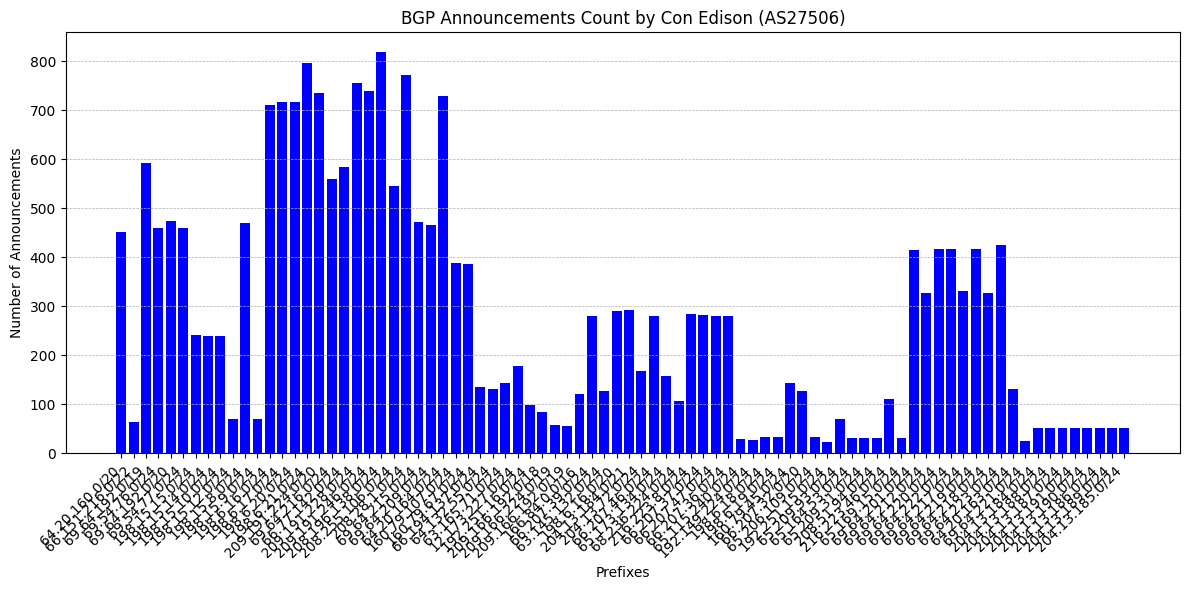

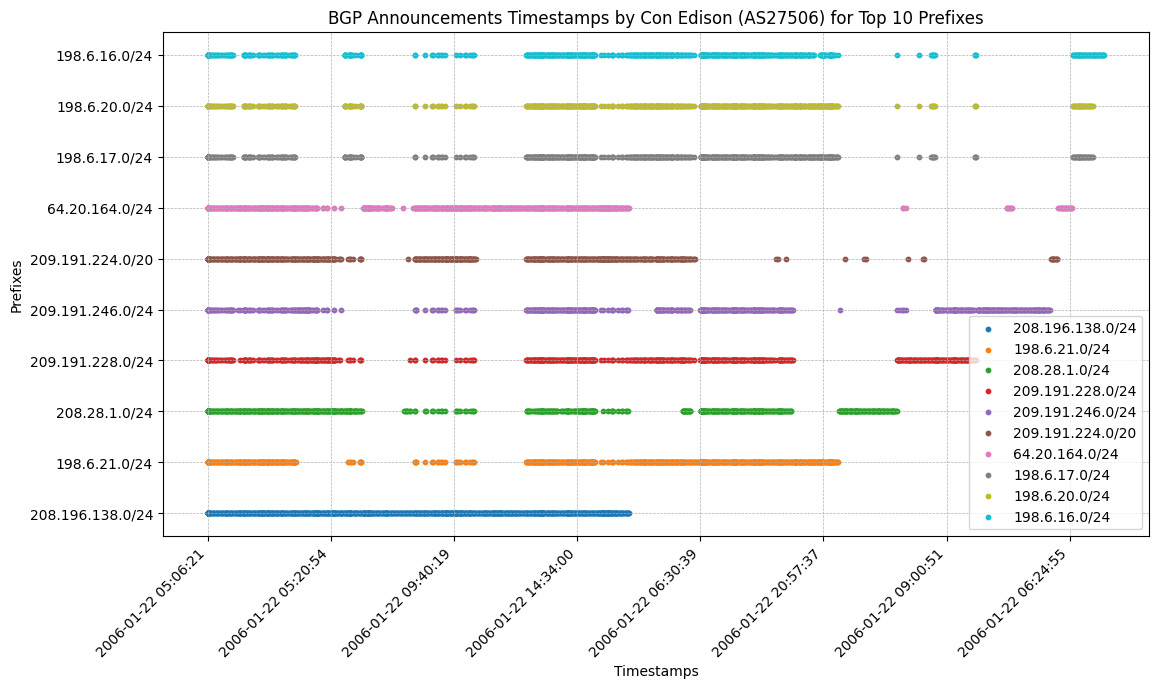

In [59]:
import pybgpstream
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Define the time window around the incident
start_time = "2006-01-22 00:00:00"
end_time = "2006-01-23 00:00:00"

# Initialize the BGPStream
stream = pybgpstream.BGPStream(
    from_time=start_time,
    until_time=end_time,
    collectors=["route-views2", "route-views3", "route-views4", "ris-ripe", "bview"],
    record_type="updates"
)

# Dictionary to store prefix data
cec_announcements_data = {}

# Process BGP records
for rec in stream.records():
    for elem in rec:
        if elem.type == "A":  # Check for BGP announcements
            as_path = elem.fields["as-path"].split()
            origin_as = as_path[-1]
            
            # Check if the origin AS is Con Edison's AS number (AS27506)
            if origin_as == "27506":
                prefix = elem.fields["prefix"]
                timestamp = elem.time
                
                if prefix not in cec_announcements_data:
                    cec_announcements_data[prefix] = {'count': 0, 'timestamps': []}
                
                cec_announcements_data[prefix]['count'] += 1
                cec_announcements_data[prefix]['timestamps'].append(timestamp)

# Visualization
prefixes = list(cec_announcements_data.keys())
counts = [data['count'] for data in cec_announcements_data.values()]

# Plot for counts
plt.figure(figsize=(12, 6))
plt.bar(prefixes, counts, color='blue')
plt.xlabel('Prefixes')
plt.ylabel('Number of Announcements')
plt.title('BGP Announcements Count by Con Edison (AS27506)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')
plt.show()

# Sort prefixes by count and take the top 10
top_prefixes = sorted(cec_announcements_data.keys(), key=lambda x: cec_announcements_data[x]['count'], reverse=True)[:10]

# Plot for timestamps
plt.figure(figsize=(12, 6))
for i, prefix in enumerate(top_prefixes):
    timestamps = [datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S') for ts in cec_announcements_data[prefix]['timestamps']]
    y = [i] * len(timestamps)
    plt.scatter(timestamps, y, label=prefix, s=10)

plt.xlabel('Timestamps')
plt.ylabel('Prefixes')
plt.yticks(range(len(top_prefixes)), top_prefixes)
plt.title('BGP Announcements Timestamps by Con Edison (AS27506) for Top 10 Prefixes')
plt.tight_layout()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Limit the number of x-axis ticks
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(nbins=10, prune='both'))

plt.show()

## YouTube BGP Hijacking Incident on February 24, 2008
On February 24, 2008, On February 24, 2008, a significant disruption in global internet traffic occurred, leading to the inaccessibility of YouTube, a popular video-sharing platform. The root cause of this disruption was an unauthorized BGP (Border Gateway Protocol) announcement made by Pakistan Telecom (AS17557).

This new route was propagated by PCCW Global, an upstream provider for Pakistan Telecom, causing a significant portion of YouTube's traffic to be mistakenly redirected to Pakistan. In response, YouTube began announcing the same prefix and subsequently more specific prefixes to reclaim its traffic. The situation escalated with routes being extended to make them less preferable. The incident concluded when PCCW Global withdrew all the problematic prefixes from Pakistan Telecom. This event highlighted the vulnerabilities in the BGP protocol and the importance of rapid response to such incidents.

In [4]:
import pybgpstream
from collections import defaultdict

# Define the time window around the incident
start_time = "2008-02-24 18:00:00"
end_time = "2008-02-24 22:00:00"

# Initialize the BGPStream
stream = pybgpstream.BGPStream(
    from_time=start_time,
    until_time=end_time,
    collectors=["route-views2", "route-views3", "route-views4", "ris-ripe"],
    record_type="updates"
)

# Dictionary to store the AS paths and their respective announcements for the prefix
prefix_announcements = defaultdict(list)

# Process BGP records
for rec in stream.records():
    for elem in rec:
        if elem.type == "A" and elem.fields["prefix"] == "208.65.153.0/24":
            as_path = elem.fields["as-path"].split()
            origin_as = as_path[-1]
            prefix_announcements[origin_as].append(as_path)

# Check for unauthorized announcements
# Assuming AS36561 is the legitimate owner of the prefix
legitimate_as = "36561"
unauthorized_as = [asn for asn in prefix_announcements if asn != legitimate_as]

if unauthorized_as:
    print(f"Unauthorized announcements detected for prefix 208.65.153.0/24 by ASes: {', '.join(unauthorized_as)}")
else:
    print("No unauthorized announcements detected for prefix 208.65.153.0/24.")

Unauthorized announcements detected for prefix 208.65.153.0/24 by ASes: 17557


Establish a Baseline: Monitor BGP announcements over a period of time (e.g., a month) to understand which ASes typically announce which prefixes. Store this data.

Real-time Monitoring: Continuously monitor BGP announcements. For each prefix announced, check if the announcing AS is one of the typical ASes from the baseline. If not, it's a potential anomaly.

Thresholds & Filters: To reduce false positives, you might want to set thresholds (e.g., only flag if an AS announces a prefix it doesn't own more than X times in Y minutes). You might also want to filter out certain known behaviors (e.g., large ISPs that frequently change their announcements).

In [ ]:
import pybgpstream
from collections import defaultdict

# Step 1: Establish a Baseline
baseline_stream = pybgpstream.BGPStream(
    from_time="2008-01-01 00:00:00",
    until_time="2008-02-01 00:00:00",
    collectors=["route-views2", "route-views3", "route-views4", "ris-ripe"],
    record_type="updates"
)

baseline = defaultdict(set)

for rec in baseline_stream.records():
    for elem in rec:
        if elem.type == "A":
            prefix = elem.fields["prefix"]
            origin_as = elem.fields["as-path"].split()[-1]
            baseline[prefix].add(origin_as)

# Step 2: Real-time Monitoring
monitor_stream = pybgpstream.BGPStream(
    from_time="2008-02-24 18:00:00",
    until_time="2008-02-24 22:00:00",
    collectors=["route-views2", "route-views3", "route-views4", "ris-ripe"],
    record_type="updates"
)

anomalies = defaultdict(set)

for rec in monitor_stream.records():
    for elem in rec:
        if elem.type == "A":
            prefix = elem.fields["prefix"]
            origin_as = elem.fields["as-path"].split()[-1]
            if prefix in baseline and origin_as not in baseline[prefix]:
                anomalies[prefix].add(origin_as)

# Print unauthorized announcements
for prefix, ases in anomalies.items():
    print(f"Unauthorized announcements of prefix {prefix} by ASes: {', '.join(ases)}")
